<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   classes                   8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

,classes,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


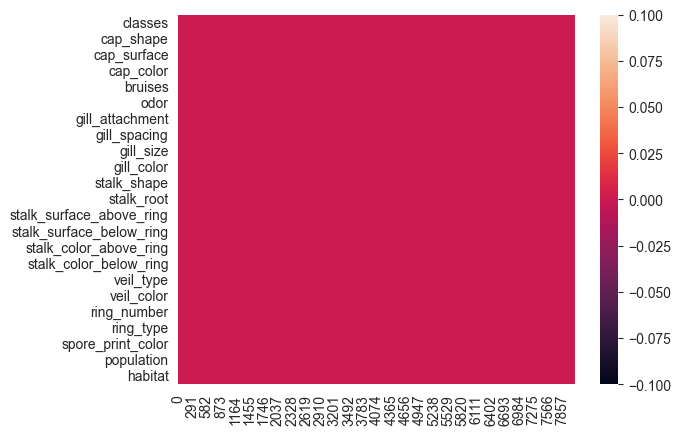

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('../dataset/mushroom.csv')
sns.heatmap(df.isna().transpose())
df.info()
df

# Подготовка данных с использованием OneHotEncoder и LabelEncoder

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

encoder = OneHotEncoder(sparse_output=False)
label_encoding = LabelEncoder()

one_hot_encoded = encoder.fit_transform(df.drop(columns=['classes']))
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(df.columns.drop('classes')),
                          index=df.index)

y = pd.Series(label_encoding.fit_transform(df['classes']), index=df.index)
X = one_hot_df

final_df = pd.concat([y, X], axis=1)
final_df


,0,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_f,cap_surface_g,cap_surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Разделение данных на обучающую и тестовую выборки

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Выбор случайных признаков для построения дерева

In [4]:
import numpy as np

n_features = int(np.sqrt(X_train.shape[1]))
selected_features = np.random.choice(X_train.columns, n_features, replace=False)
print(f"Признаки: {selected_features}")

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


Признаки: ['gill_color_o' 'stalk_surface_above_ring_k' 'cap_shape_s' 'gill_color_h'
 'cap_surface_y' 'cap_shape_f' 'stalk_surface_above_ring_y'
 'spore_print_color_k' 'veil_color_w' 'spore_print_color_b']


# Построение и тестирование дерева решений

In [5]:
from decision_tree import build_tree, predict, predict_proba

tree = build_tree(X_train_selected, y_train, depth=0, max_depth=5, n_features=n_features)
y_pred = np.array([predict(sample, tree) for _, sample in X_test_selected.iterrows()])

# Расчет метрик: точность, полнота, точность предсказания

In [6]:
tp = np.sum((y_test == 1) & (y_pred == 1))
fp = np.sum((y_test == 0) & (y_pred == 1))
fn = np.sum((y_test == 1) & (y_pred == 0))
tn = np.sum((y_test == 0) & (y_pred == 0))

accuracy = np.sum(y_test == y_pred) / len(y_test)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}')

Accuracy: 0.56
Precision: 0.76
Recall: 0.13
TP: 157, TN: 1207, FP: 50, FN: 1024


# Построение ROC-кривой

In [8]:
def roc_curve(y_true, y_scores, step=0.1):
    fpr_list = []
    tpr_list = []
    thresholds = np.arange(0, 1.1, step)

    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        tp = np.sum((y_true == 1) & (y_pred == 1))
        tn = np.sum((y_true == 0) & (y_pred == 0))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))

        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        fpr_list.append(fpr)
        tpr_list.append(tpr)
    return fpr_list, tpr_list

y_scores = np.array([
    predict_proba(sample, tree)[1] if predict_proba(sample, tree) is not None and len(predict_proba(sample, tree)) > 1
    else 0.5
    for _, sample in X_test_selected.iterrows()
])

roc_x, roc_y = roc_curve(y_test, y_scores, step=0.1)

# Построение PR-кривой

In [9]:
def calculate_pr(y_true, y_scores):
    thresholds = np.arange(0, 1.1, 0.1)
    precision_list = [0]
    recall_list = [1]
    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        tp = np.sum((y_true == 1) & (y_pred == 1))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))
        precision_value = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall_value = tp / (tp + fn) if (tp + fn) > 0 else 0
        precision_list.append(precision_value)
        recall_list.append(recall_value)

    return precision_list, recall_list

precision_values, recall_values = calculate_pr(y_test, y_scores)

# Вычисление AUC для ROC и PR кривых

In [10]:
auc_roc = np.trapz(roc_y, roc_x)
auc_pr = np.trapz(precision_values, recall_values)

print(f'AUC-ROC: {auc_roc:.2f}')
print(f'AUC-PR: {auc_pr:.2f}')

AUC-ROC: 0.78
AUC-PR: 0.69


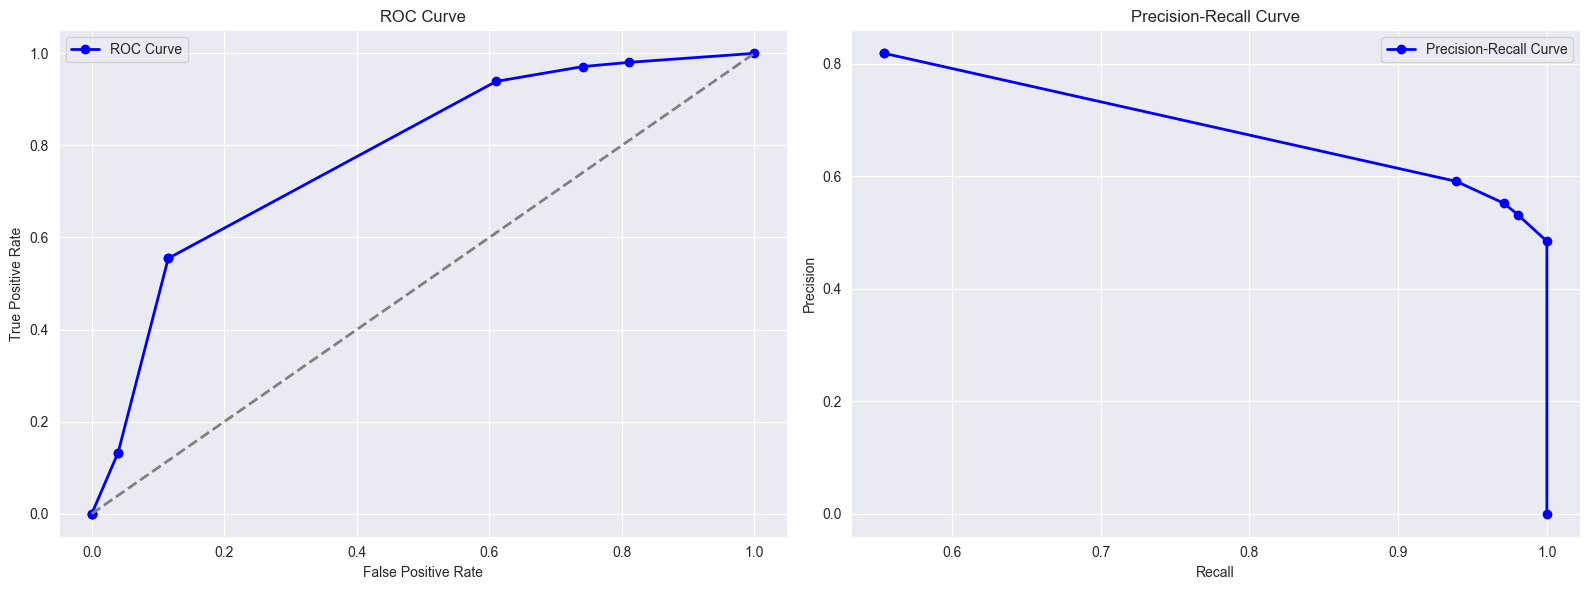

In [12]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(roc_x, roc_y, color='blue', lw=2, label='ROC Curve', marker='o')
ax[0].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Линия 50%
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve')
ax[0].legend(loc='best')

filtered_recall = [r for r in recall_values if r >= 0.2]
filtered_precision = precision_values[:len(filtered_recall)]

ax[1].plot(filtered_recall, filtered_precision, color='blue', lw=2, label='Precision-Recall Curve', marker='o')
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall Curve')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()